In [26]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.2 |Anaconda custom (64-bit)| (default, Sep 19 2017, 08:03:39) [MSC v.1900 64 bit (AMD64)]
scipy: 0.19.1
numpy: 1.13.1
matplotlib: 2.0.2
pandas: 0.20.3
sklearn: 0.19.0


In [27]:
# Load libraries
import sys
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [28]:
# Load dataset
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data";
#url = '\amit\Miniconda3\learning\data\dip4.csv';
#url = "filepath\filename.csv"
#names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'];  
#names = ['Shape', 'Color', 'Size', 'Class'];     
dataset = pandas.read_csv('C:/Users/amit/Miniconda3/envs/py3k/Lib/site-packages/bokeh/sampledata/iris.csv')

In [29]:
#Summarize the Dataset

print(dataset.shape)

#Peek at the data itself.
print(dataset.head(20))

#Statistical summary of all attributes.
print(dataset.describe())

#Breakdown of the data by the class variable.
print(dataset.groupby('species').size())

(150, 5)
    sepal_length  sepal_width  petal_length  petal_width species
0            5.1          3.5           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14           5.8

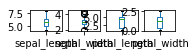

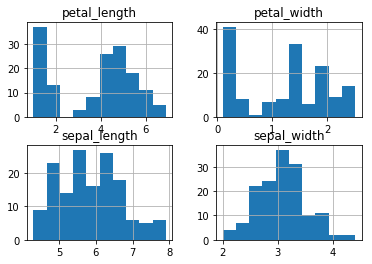

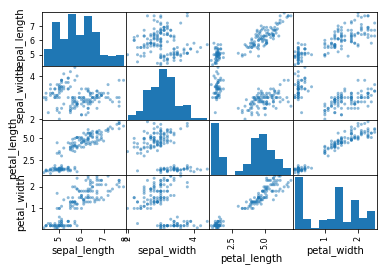

In [30]:
#plots
#Univariate Plots
#box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

# histogram
dataset.hist()
plt.show()

# multivariate plots
scatter_matrix(dataset)
plt.show()

In [31]:
#Evaluate Some Algorithms
#Separate out a validation dataset.
#Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

#Set-up the test harness to use 10-fold cross validation.
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.966667 (0.040825)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


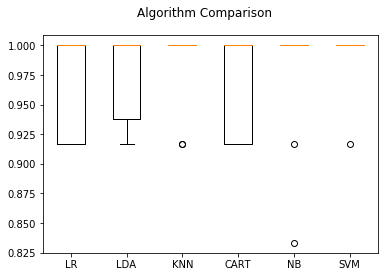

In [32]:
#Build 5 different models to predict species from flower measurements
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
	
#Select the best model.
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [33]:
#Make Predictions
# Make predictions on validation dataset

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
print('for knn');
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
svm = SVC();
svm.fit(X_train, Y_train);
print('for svm');
predictions = svm.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

for knn
0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         7
 versicolor       0.85      0.92      0.88        12
  virginica       0.90      0.82      0.86        11

avg / total       0.90      0.90      0.90        30

for svm
0.933333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         7
 versicolor       1.00      0.83      0.91        12
  virginica       0.85      1.00      0.92        11

avg / total       0.94      0.93      0.93        30

